In [7]:
from data_provider.data_loader import HuaweiDataset
import torch

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

# retina 
%config InlineBackend.figure_format = 'retina'

dataset = HuaweiDataset(path="/home/user/suzhao/BehaviorDL/dataset/Huawei", label_flag='emotion')

In [20]:
dataset.all_df

,recordtime,activityName,step,avgOxygenSaturation,avgHeartRate,emotion,energy
index,,,,,,,
0,2021-11-17 00:00:00,NaN,NaN,NaN,NaN,2.0,7.0
0,2021-11-17 00:01:00,NaN,NaN,NaN,NaN,2.0,7.0
0,2021-11-17 00:02:00,NaN,NaN,NaN,NaN,2.0,7.0
0,2021-11-17 00:03:00,NaN,NaN,NaN,NaN,2.0,7.0
0,2021-11-17 00:04:00,NaN,NaN,NaN,NaN,2.0,7.0
...,...,...,...,...,...,...,...
839,2021-12-13 23:56:00,NaN,NaN,NaN,NaN,1.0,7.0
839,2021-12-13 23:57:00,NaN,NaN,NaN,NaN,1.0,7.0
839,2021-12-13 23:58:00,NaN,NaN,NaN,NaN,1.0,7.0


# 数据

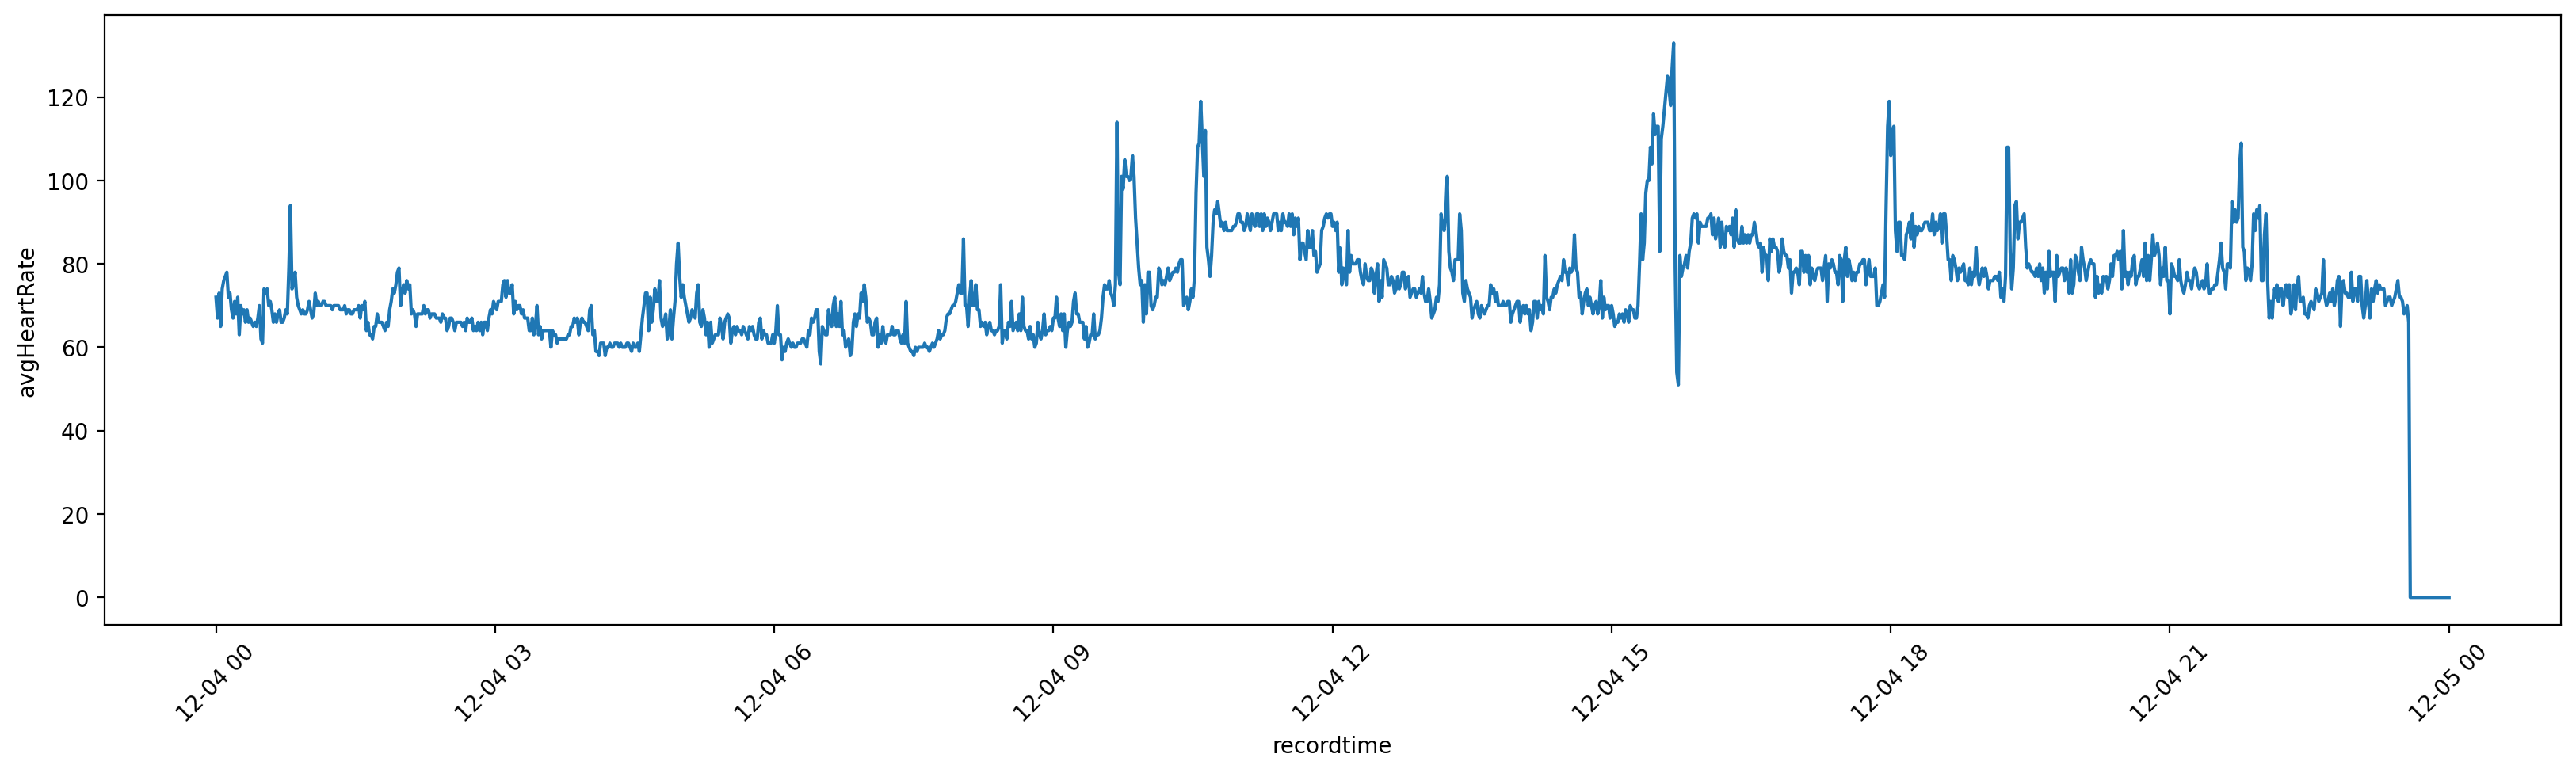

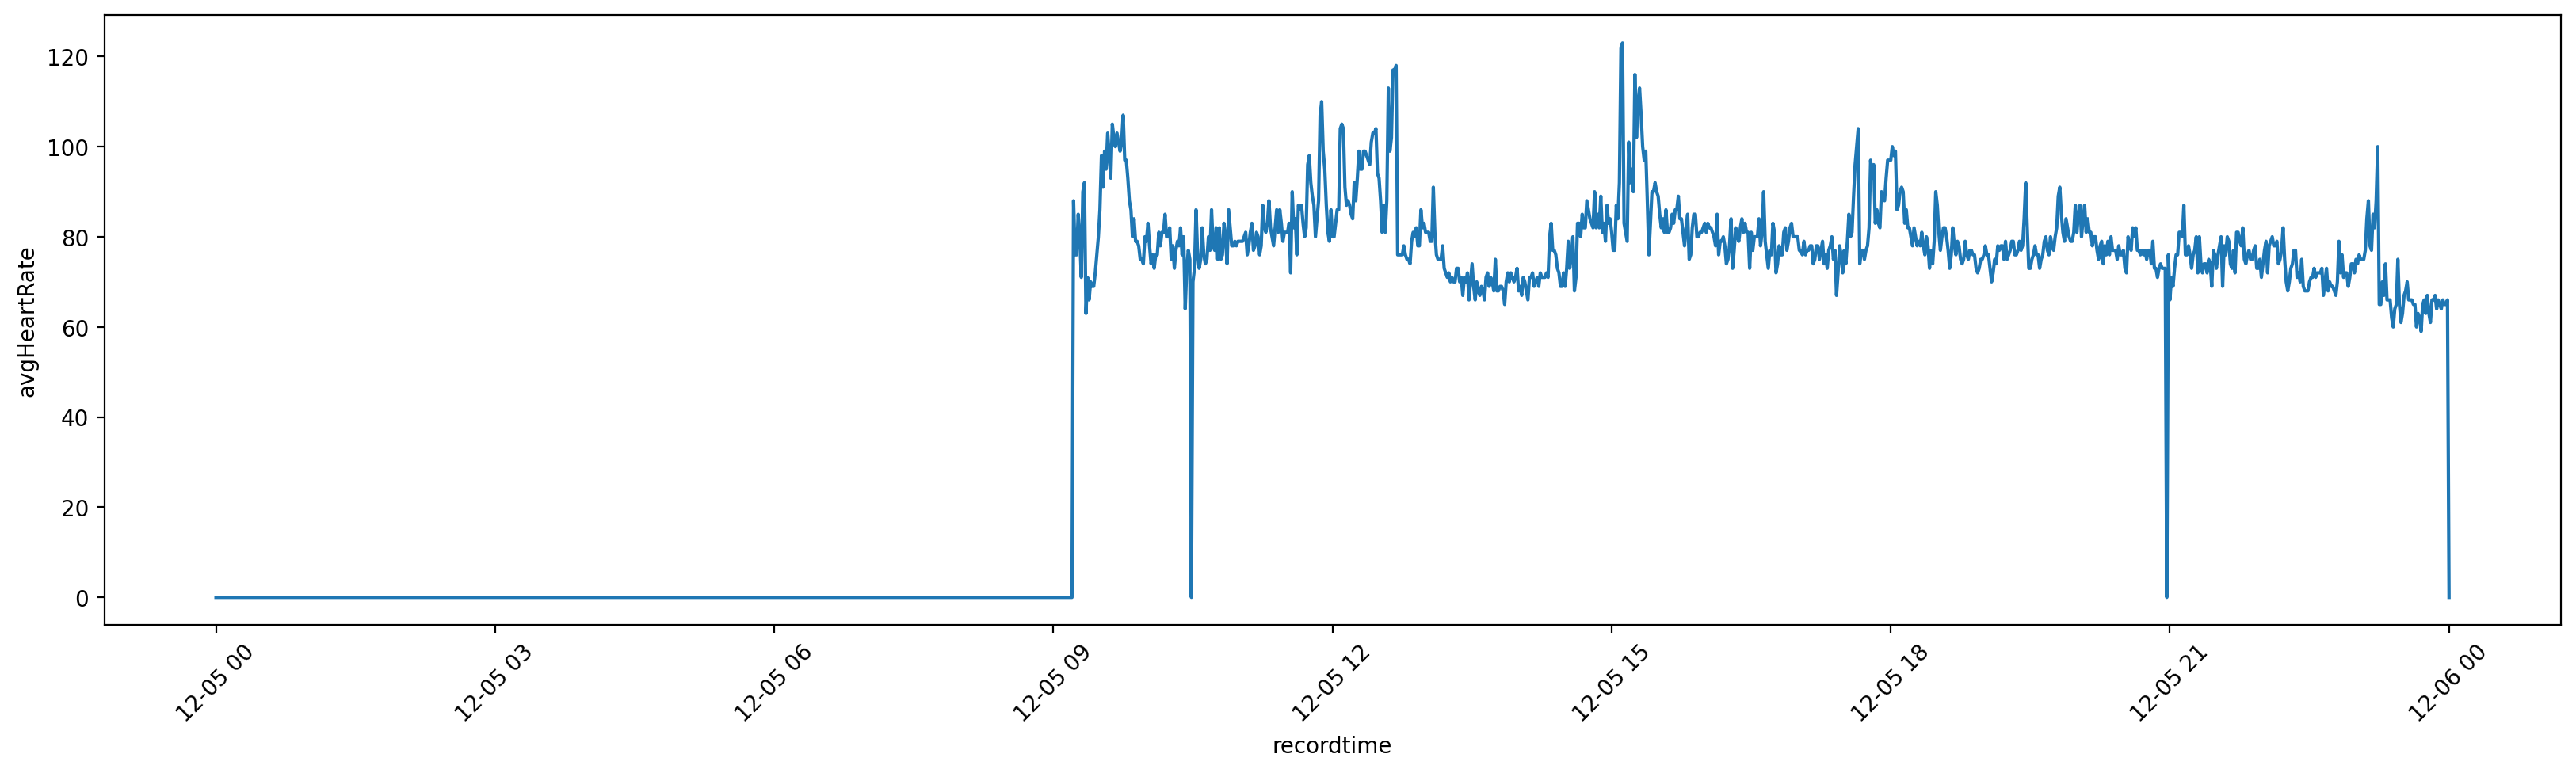

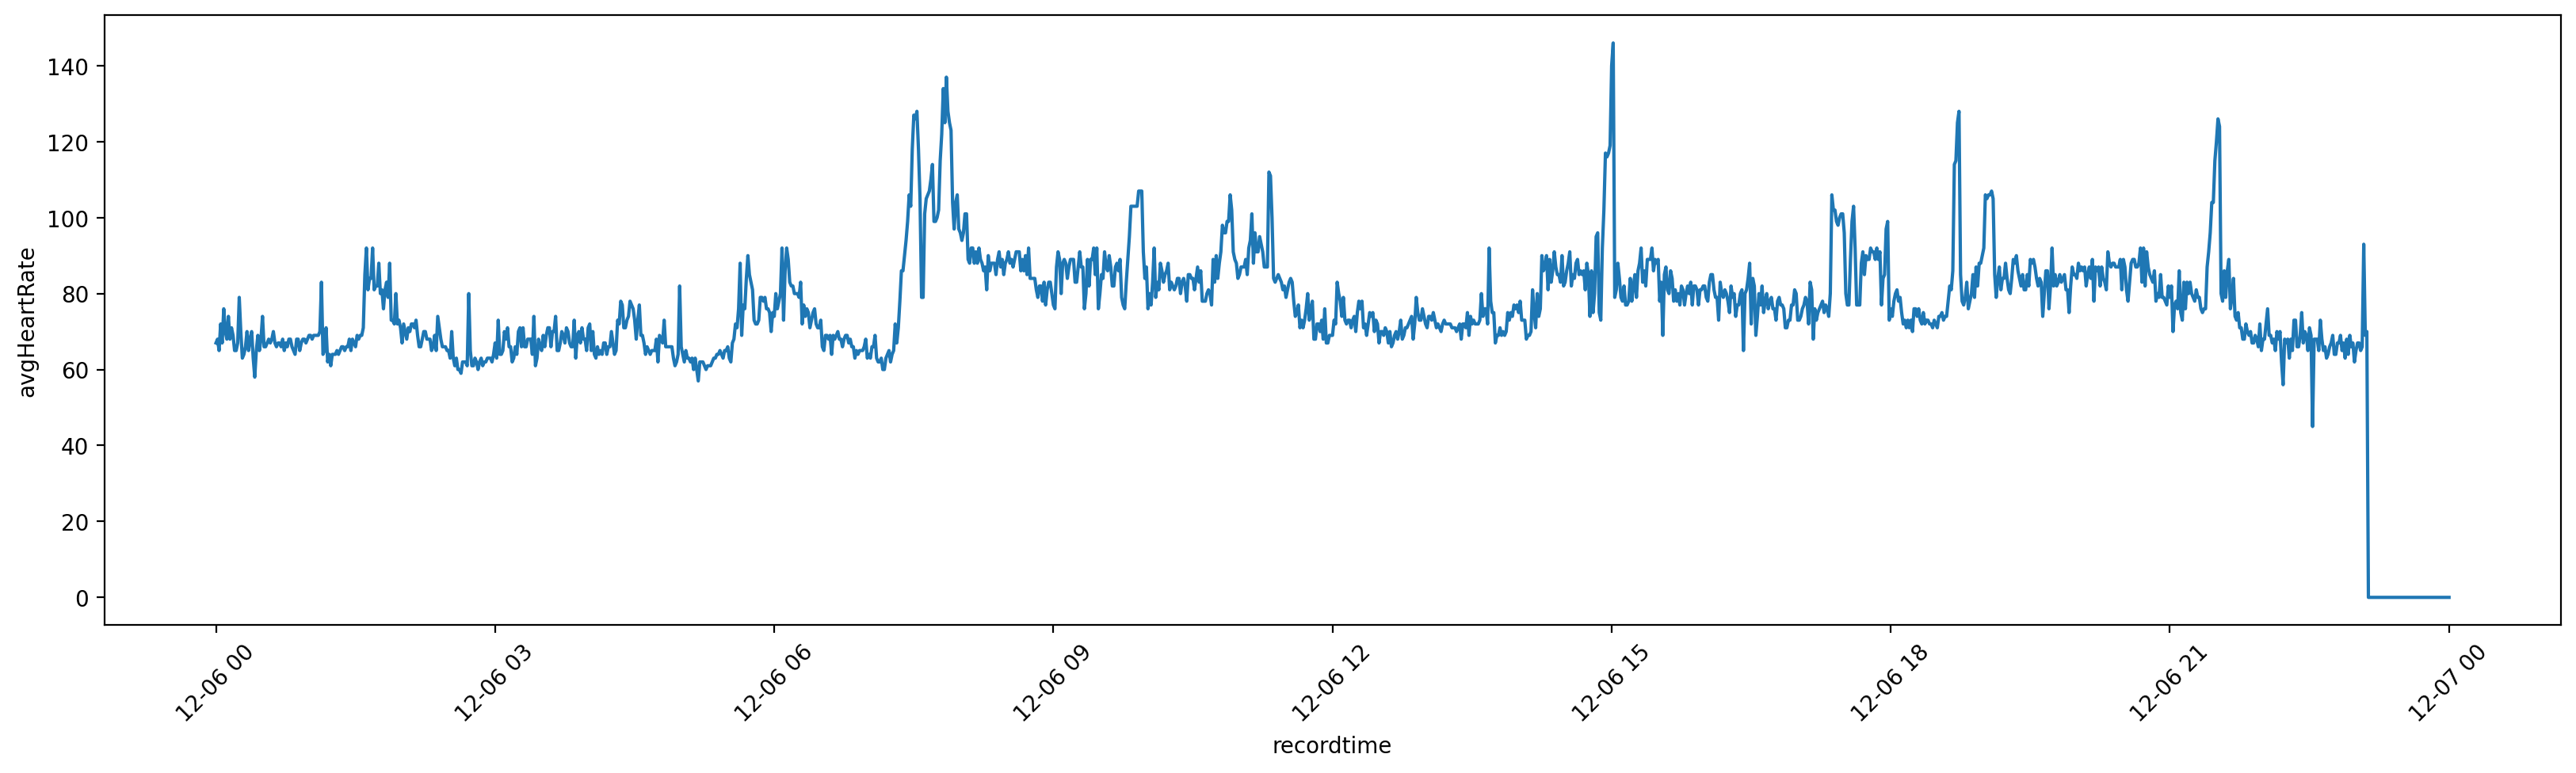

In [22]:
df = dataset.all_df

def plot_day(index, col) -> None:
    '''
    index: int, index of the patient
    col: str, column name
    '''
    df_plot = df.loc[index].fillna(0)
    plt.figure(figsize=(20, 5))
    sns.lineplot(data=df_plot, x='recordtime', y=col)
    plt.xticks(rotation=45)

plot_day(67, 'avgHeartRate')
plot_day(68, 'avgHeartRate')
plot_day(69, 'avgHeartRate')

In [4]:
weights = [1 if i < 3 else 9 for i in dataset.labels_df.values]
sampler = torch.utils.data.WeightedRandomSampler(
    weights=weights, 
    num_samples=len(dataset),
    replacement=True
)
train_loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=32,
    sampler=sampler,
    num_workers=4,
)

<Axes: xlabel='day', ylabel='emotion'>

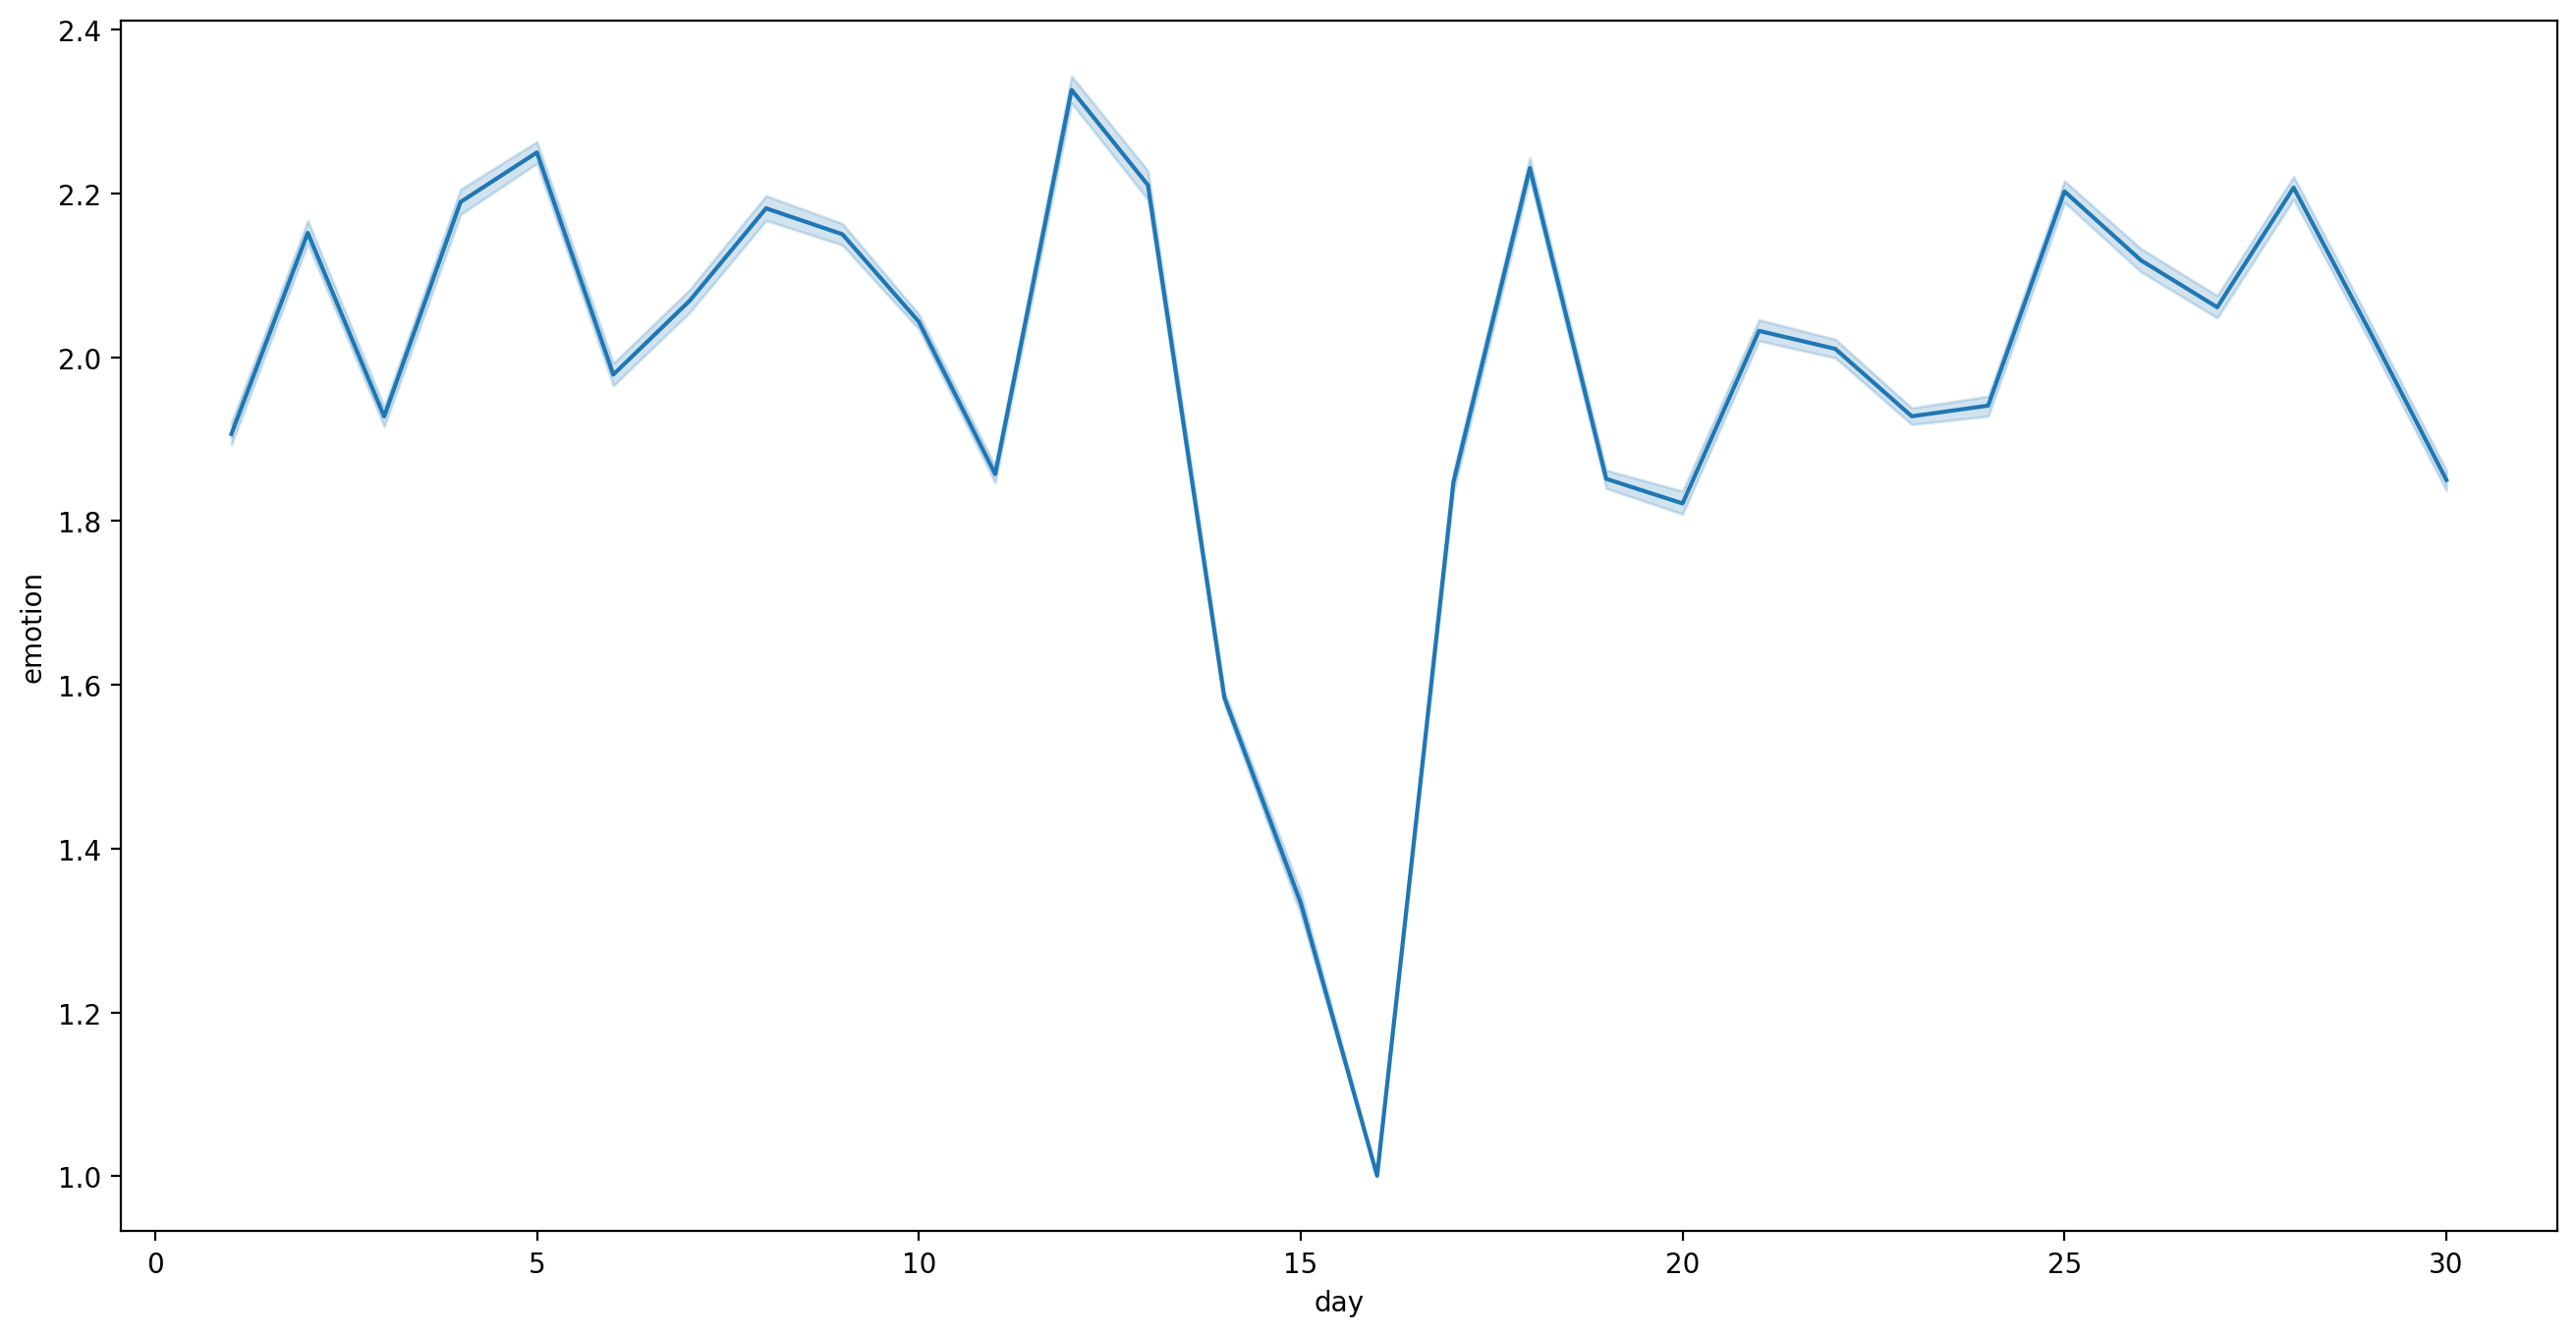

In [7]:
plot_data = dataset.all_df
plot_data['day'] = plot_data['recordtime'].dt.day
import seaborn as sns
import matplotlib.pyplot as plt 

# set retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.figure(figsize=(16, 8))
sns.lineplot(x="day", y="emotion", data=plot_data)

In [4]:
df['id'] = df.index
df.reset_index(drop=True, inplace=True)
df

,emotion,energy,id
0,2.0,7.0,0
1,2.0,7.0,0
2,2.0,7.0,0
3,2.0,7.0,0
4,2.0,7.0,0
...,...,...,...
1210435,1.0,7.0,839
1210436,1.0,7.0,839
1210437,1.0,7.0,839
1210438,1.0,7.0,839


In [5]:
df.drop_duplicates(subset=['emotion', 'energy', 'id'], keep='first', inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)
df = df.query('energy < 3 or energy > 5')

<Axes: xlabel='id', ylabel='energy'>

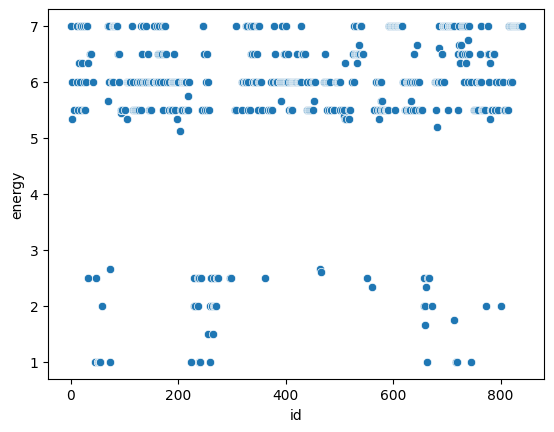

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='id', y='energy', data=df)

<Axes: xlabel='id', ylabel='emotion'>

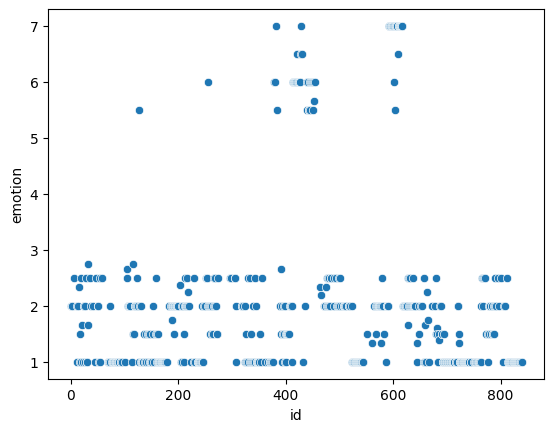

In [8]:
sns.scatterplot(x='id', y='emotion', data=df)


<Axes: xlabel='emotion', ylabel='energy'>

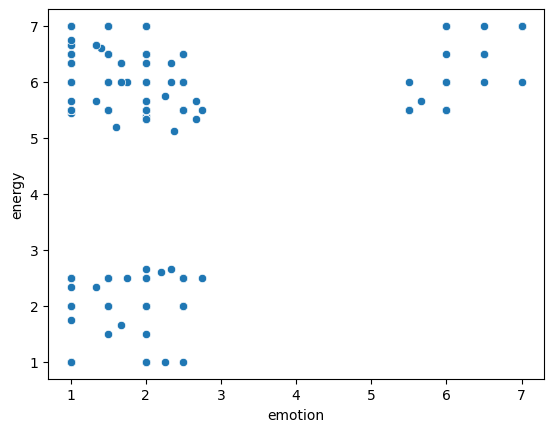

In [9]:
sns.scatterplot(x='emotion', y='energy', data=df)